<a href="https://colab.research.google.com/github/ikadeksandratiana/DataAnalytics/blob/main/UTS_19101223_I_Kadek_Sandratiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d vinod00725/svm-classification

  0% 0.00/72.3k [00:00<?, ?B/s]
100% 72.3k/72.3k [00:00<00:00, 12.3MB/s]


In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  svm-classification.zip
replace Activity Sheet.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Activity Sheet.docx     
  inflating: SVM_Classification.R    
  inflating: UniversalBank.csv       


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = 'UniversalBank.csv'

df = pd.read_csv(data)

In [11]:
df.shape

(5000, 14)

In [12]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
X = df.drop(['CreditCard'], axis=1)

y = df['CreditCard']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape, X_test.shape

((4000, 13), (1000, 13))

In [17]:
cols = X_train.columns

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [20]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [21]:
X_train.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,1.047148e-16,8.820722e-17,-9.203749e-17,-4.454770e-17,2.580948e-15,-3.212985e-16,1.693090e-18,-6.400436e-17,1.387224e-16,-7.638334e-17,6.427220e-16,-7.165379e-16,2.525757e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.732418e+00,-1.941993e+00,-2.006748e+00,-1.425882e+00,-3.807548e+01,-1.212103e+00,-1.108479e+00,-1.046601e+00,-5.517533e-01,-3.286841e-01,-3.461515e-01,-2.543212e-01,-1.211451e+00
25%,-8.646705e-01,-8.975483e-01,-8.768221e-01,-7.560813e-01,-5.463612e-01,-1.212103e+00,-7.101091e-01,-1.046601e+00,-5.517533e-01,-3.286841e-01,-3.461515e-01,-2.543212e-01,-1.211451e+00
50%,-1.323063e-02,-2.717733e-02,-7.648726e-03,-2.159191e-01,1.194385e-01,-3.433677e-01,-2.548298e-01,1.498563e-01,-5.517533e-01,-3.286841e-01,-3.461515e-01,-2.543212e-01,8.254567e-01
75%,8.637108e-01,8.431936e-01,8.615247e-01,5.403081e-01,6.648856e-01,5.253678e-01,3.711793e-01,1.346314e+00,4.270241e-01,-3.286841e-01,-3.461515e-01,-2.543212e-01,8.254567e-01
max,1.736489e+00,1.887639e+00,1.991450e+00,3.241119e+00,1.592736e+00,1.394103e+00,4.582513e+00,1.346314e+00,5.790325e+00,3.042435e+00,2.888909e+00,3.932036e+00,8.254567e-01


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.7490


In [23]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('C=100.0 Model accuracy with rbf kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C=100.0 Model accuracy with rbf kernel : 0.6970


In [24]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.7470


In [25]:
linear_svc=SVC(kernel='linear', C=10.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=10.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=10.0 Model accuracy with linear kernel : 0.7470


In [26]:
linear_svc=SVC(kernel='linear', C=100.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=100.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=100.0 Model accuracy with linear kernel : 0.7470


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[696   8]
 [245  51]]

True Positives(TP) =  696

True Negatives(TN) =  51

False Positives(FP) =  8

False Negatives(FN) =  245


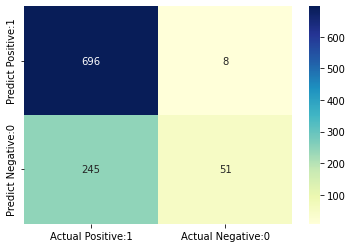

In [28]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [31]:
print('Cross-validation with linear kernel:\n\n{}'.format(linear_scores))

Cross-validation with linear kernel:

[0.704 0.704 0.721 0.686 0.716]


In [32]:
print('Average cross-validation with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average cross-validation with linear kernel:0.7062


In [33]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [34]:
print('Cross-validation with rbf kernel:\n\n{}'.format(rbf_scores))

Cross-validation with rbf kernel:

[0.704 0.703 0.721 0.686 0.716]


In [35]:
print('Average cross-validation with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average cross-validation with rbf kernel:0.7060


In [36]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc=SVC() 


parameters = [ {'C':[1, 10, 50], 'kernel':['linear']},
               {'C':[1, 10, 50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.5, 0.9]}
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [37]:
print('GridSearch CV best: {:.4f}\n\n'.format(grid_search.best_score_))


print('Best results :','\n\n', (grid_search.best_params_))

GridSearch CV best: 0.7435


Best results : 

 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
